In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston_data=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv")

In [3]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


In [4]:
x=boston_data.drop('MEDV',axis=1)
y=boston_data.MEDV

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
 n_features=x.shape[1]
print (n_features)

13


In [7]:
!pip install tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
import tensorflow

In [8]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(n_features,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import RMSprop
optimizer=RMSprop(0.01)#0.01 is the learning rate

In [11]:
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [12]:
import random
seed_value=random.randint(2,200)
seed(seed_value)
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import numpy as np
np.random.seed(seed_value)
tensorflow.random.set_seed(seed_value)

In [13]:
x_train.shape[0]

323

In [14]:
model.fit(x_train,y_train,epochs=10,batch_size=30,verbose=1)

Epoch 1/10
11/11 [==============================] - 1s 900us/step - loss: 901.4872
Epoch 2/10
11/11 [==============================] - 0s 799us/step - loss: 86.9971
Epoch 3/10
11/11 [==============================] - 0s 901us/step - loss: 82.9018
Epoch 4/10
11/11 [==============================] - 0s 899us/step - loss: 94.8974
Epoch 5/10
11/11 [==============================] - 0s 699us/step - loss: 76.3814
Epoch 6/10
11/11 [==============================] - 0s 899us/step - loss: 97.8906
Epoch 7/10
11/11 [==============================] - 0s 1000us/step - loss: 88.3601
Epoch 8/10
11/11 [==============================] - 0s 699us/step - loss: 77.3273
Epoch 9/10
11/11 [==============================] - 0s 801us/step - loss: 85.7292
Epoch 10/10
11/11 [==============================] - 0s 800us/step - loss: 69.8099


In [15]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 77.3477


77.34768676757812

In [16]:
y_test.values.shape

(81,)

In [17]:
y_pred=model.predict(x_test)

In [18]:
y_pred.flatten().shape

(81,)

In [19]:
diff=np.subtract(model.predict(x_test).flatten(),y_test.values)

In [20]:
diff.shape

(81,)

In [21]:
diff=diff*diff

In [22]:
sum(diff)/(len(diff))

77.34767937843188

In [23]:
def plot_the_loss_curve(epochs,rmse):
    """PLOT A CURVE OF LOSS VS. EPOCH"""
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs,rmse,label="loss")
    plt.legend()
    plt.show()

In [25]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(n_features,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
optimizer=RMSprop(0.1)
model.compile(loss='mean_squared_error',optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=10,batch_size=30,verbose=1)
print('The MSE value is:',model.evaluate(x_test,y_test))

Epoch 1/10
11/11 [==============================] - 0s 799us/step - loss: 6773.0913
Epoch 2/10
11/11 [==============================] - 0s 798us/step - loss: 571.5765
Epoch 3/10
11/11 [==============================] - 0s 700us/step - loss: 542.4873
Epoch 4/10
11/11 [==============================] - 0s 901us/step - loss: 506.9092
Epoch 5/10
11/11 [==============================] - 0s 800us/step - loss: 468.1935
Epoch 6/10
11/11 [==============================] - 0s 800us/step - loss: 429.4333
Epoch 7/10
11/11 [==============================] - 0s 900us/step - loss: 392.5531
Epoch 8/10
11/11 [==============================] - 0s 899us/step - loss: 357.4514
Epoch 9/10
11/11 [==============================] - 0s 698us/step - loss: 324.5664
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 259.6059
The MSE value is: 259.60589599609375


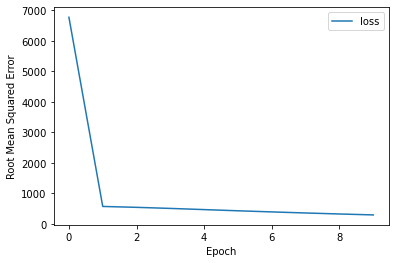

In [27]:
plot_the_loss_curve(history.epoch,history.history['loss'])

In [28]:
learning_rate=0.1
epochs=20
optimizer=RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=epochs,batch_size=30)
model.evaluate(x_test,y_test)

Epoch 1/20
11/11 [==============================] - 1s 800us/step - loss: 253.0215
Epoch 2/20
11/11 [==============================] - 0s 800us/step - loss: 220.0668
Epoch 3/20
11/11 [==============================] - 0s 800us/step - loss: 196.5562
Epoch 4/20
11/11 [==============================] - 0s 801us/step - loss: 176.9367
Epoch 5/20
11/11 [==============================] - 0s 1ms/step - loss: 159.4732
Epoch 6/20
11/11 [==============================] - 0s 899us/step - loss: 144.0799
Epoch 7/20
11/11 [==============================] - 0s 600us/step - loss: 131.1345
Epoch 8/20
11/11 [==============================] - 0s 798us/step - loss: 119.9810
Epoch 9/20
11/11 [==============================] - 0s 700us/step - loss: 110.9147
Epoch 10/20
11/11 [==============================] - 0s 699us/step - loss: 103.9245
Epoch 11/20
11/11 [==============================] - 0s 899us/step - loss: 98.9219
Epoch 12/20
11/11 [==============================] - 0s 701us/step - loss: 95.4880
Epoch

71.10045623779297

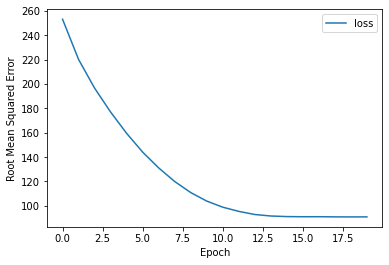

In [29]:
plot_the_loss_curve(history.epoch,history.history['loss'])

In [30]:
x_train.shape

(323, 13)

In [31]:
learning_rate=0.1
epochs=100
optimizer=RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=epochs,batch_size=30)
model.evaluate(x_test,y_test)

Epoch 1/100
11/11 [==============================] - 0s 800us/step - loss: 91.0586
Epoch 2/100
11/11 [==============================] - 0s 899us/step - loss: 91.1291
Epoch 3/100
11/11 [==============================] - 0s 700us/step - loss: 90.9576
Epoch 4/100
11/11 [==============================] - 0s 899us/step - loss: 90.9914
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 91.0207
Epoch 6/100
11/11 [==============================] - 0s 700us/step - loss: 90.9075
Epoch 7/100
11/11 [==============================] - 0s 799us/step - loss: 90.9422
Epoch 8/100
11/11 [==============================] - 0s 999us/step - loss: 90.9636
Epoch 9/100
11/11 [==============================] - 0s 700us/step - loss: 91.1265
Epoch 10/100
11/11 [==============================] - 0s 700us/step - loss: 90.9336
Epoch 11/100
11/11 [==============================] - 0s 999us/step - loss: 90.9542
Epoch 12/100
11/11 [==============================] - 0s 900us/step - loss: 90.8952
Epo

71.10186767578125

In [38]:
learning_rate=0.03
epochs=200
optimizer=RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=epochs,batch_size=30)
model.evaluate(x_test,y_test)

Epoch 1/200
11/11 [==============================] - 0s 1000us/step - loss: 90.9052
Epoch 2/200
11/11 [==============================] - 0s 901us/step - loss: 90.9179
Epoch 3/200
11/11 [==============================] - 0s 1ms/step - loss: 90.8666
Epoch 4/200
11/11 [==============================] - 0s 1ms/step - loss: 90.8856
Epoch 5/200
11/11 [==============================] - 0s 900us/step - loss: 90.8896
Epoch 6/200
11/11 [==============================] - 0s 799us/step - loss: 90.8540
Epoch 7/200
11/11 [==============================] - 0s 799us/step - loss: 90.8639
Epoch 8/200
11/11 [==============================] - 0s 1ms/step - loss: 90.8709
Epoch 9/200
11/11 [==============================] - 0s 1000us/step - loss: 90.9217
Epoch 10/200
11/11 [==============================] - 0s 600us/step - loss: 90.8616
Epoch 11/200
11/11 [==============================] - 0s 899us/step - loss: 90.8709
Epoch 12/200
11/11 [==============================] - 0s 999us/step - loss: 90.8482
Epoch

Epoch 99/200
11/11 [==============================] - 0s 700us/step - loss: 90.8970
Epoch 100/200
11/11 [==============================] - 0s 899us/step - loss: 90.9160
Epoch 101/200
11/11 [==============================] - 0s 800us/step - loss: 90.8343
Epoch 102/200
11/11 [==============================] - 0s 700us/step - loss: 90.8723
Epoch 103/200
11/11 [==============================] - 0s 800us/step - loss: 90.8686
Epoch 104/200
11/11 [==============================] - 0s 800us/step - loss: 90.8686
Epoch 105/200
11/11 [==============================] - 0s 700us/step - loss: 90.8812
Epoch 106/200
11/11 [==============================] - 0s 799us/step - loss: 90.8564
Epoch 107/200
11/11 [==============================] - 0s 1000us/step - loss: 90.9204
Epoch 108/200
11/11 [==============================] - 0s 700us/step - loss: 90.8714
Epoch 109/200
11/11 [==============================] - 0s 800us/step - loss: 90.8634
Epoch 110/200
11/11 [==============================] - 0s 700us/s

11/11 [==============================] - 0s 800us/step - loss: 90.8757
Epoch 196/200
11/11 [==============================] - 0s 800us/step - loss: 90.8849
Epoch 197/200
11/11 [==============================] - 0s 700us/step - loss: 90.8621
Epoch 198/200
11/11 [==============================] - 0s 800us/step - loss: 90.8687
Epoch 199/200
11/11 [==============================] - 0s 999us/step - loss: 90.8832
Epoch 200/200
3/3 [==============================] - 0s 999us/step - loss: 71.1054


71.10535430908203

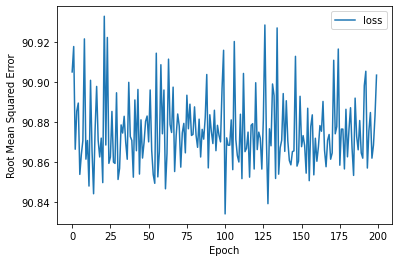

In [39]:
plot_the_loss_curve(history.epoch,history.history['loss'])

In [40]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(n_features,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
optimizer=RMSprop(0.01)
model.compile(loss='mean_squared_error',optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=10,batch_size=40,verbose=1)
print('The MSE value is:',model.evaluate(x_test,y_test)) 

Epoch 1/10
9/9 [==============================] - 0s 750us/step - loss: 449.3366
Epoch 2/10
9/9 [==============================] - 0s 925us/step - loss: 115.1028
Epoch 3/10
9/9 [==============================] - 0s 1000us/step - loss: 92.4613
Epoch 4/10
9/9 [==============================] - 0s 750us/step - loss: 86.4659
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 93.3347
Epoch 6/10
9/9 [==============================] - 0s 1ms/step - loss: 129.3006
Epoch 7/10
9/9 [==============================] - 0s 624us/step - loss: 72.9503
Epoch 8/10
9/9 [==============================] - 0s 876us/step - loss: 75.6339
Epoch 9/10
9/9 [==============================] - 0s 750us/step - loss: 72.9760
Epoch 10/10
3/3 [==============================] - 0s 999us/step - loss: 61.0786
The MSE value is: 61.07861328125


In [42]:
learning_rate=0.01
epochs=20
batch=5
optimizer=RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=epochs,batch_size=30)
model.evaluate(x_test,y_test)

Epoch 1/20
11/11 [==============================] - 1s 1ms/step - loss: 55.4695
Epoch 2/20
11/11 [==============================] - 0s 1ms/step - loss: 51.4141
Epoch 3/20
11/11 [==============================] - 0s 1ms/step - loss: 51.3684
Epoch 4/20
11/11 [==============================] - 0s 1ms/step - loss: 48.4297
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 49.7532
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 49.4101
Epoch 7/20
11/11 [==============================] - 0s 1ms/step - loss: 45.8156
Epoch 8/20
11/11 [==============================] - 0s 899us/step - loss: 47.6495
Epoch 9/20
11/11 [==============================] - 0s 899us/step - loss: 45.1889
Epoch 10/20
11/11 [==============================] - 0s 999us/step - loss: 44.6874
Epoch 11/20
11/11 [==============================] - 0s 1ms/step - loss: 41.8155
Epoch 12/20
11/11 [==============================] - 0s 1ms/step - loss: 41.2639
Epoch 13/20
11/11 [============

26.64126968383789

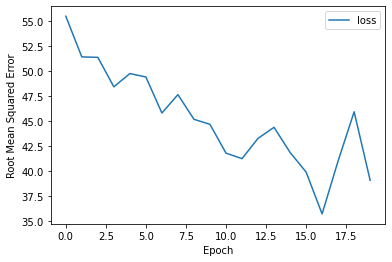

In [43]:
plot_the_loss_curve(history.epoch,history.history['loss'])